In [ ]:
## 

In [1]:
import pandas as pd
df=pd.read_csv("cell_samples.csv")
df


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


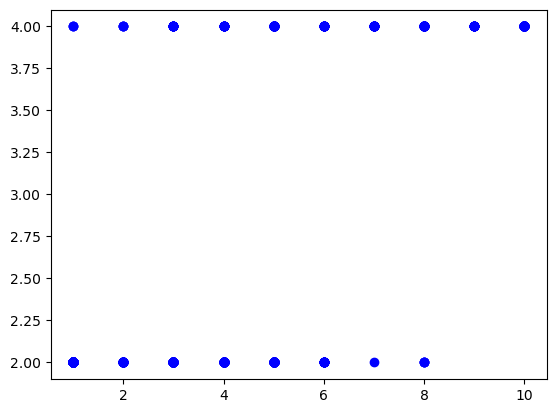

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['Clump'],df['Class'],color='blue')

## Data preprocessing

In [8]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [10]:
df.describe()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [86]:
# import numpy as np
# print(df['BareNuc'])
# df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

# df['BareNuc'] = df['BareNuc'].astype('int')
# df.dtypes
# df['BareNuc']
# feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
# X = np.asarray(feature_df)
# X[0:5]
# df['Class'] = df['Class'].astype('int')
# y = np.asarray(df['Class'])
# y [0:5]

In [99]:
X=df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
X

y=df['Class'].astype('int')

## Train and Test Split

In [102]:
from sklearn.model_selection import train_test_split

In [104]:
tX,teX,ty,tey=train_test_split(X,y,test_size=0.2)


## Model

In [107]:
from sklearn.svm import SVC

In [109]:
model= SVC(kernel='rbf')
model.fit(tX,ty)

SVC()

## Predict

In [114]:
yp=model.predict(teX)

from sklearn.metrics import accuracy_score,jaccard_score

In [124]:
print("JS= ", jaccard_score(tey,yp,pos_label=2))
print("Acc = ",accuracy_score(tey,yp))

JS=  0.9655172413793104
Acc =  0.9781021897810219
